In [1]:
# import necessary libraries
#import sklearn 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset.
house_prices_dataset = pd.read_csv("house_prices_dataset.csv")

The dataset has 100 rows and 2 columns.

The dataset head:
      area      price
0  2231.88  558852.17
1  2524.92  632260.29
2  1527.65  382994.25
3  1986.09  497607.86
4  2920.16  730870.84.

The dataset Properties:
             area          price
count   100.00000     100.000000
mean   2247.97960  562990.340700
std     453.86445  113464.467239
min    1522.16000  381657.070000
25%    1812.84750  454164.525000
50%    2284.15000  571887.305000
75%    2617.72750  655407.227500
max    2995.40000  749686.490000.



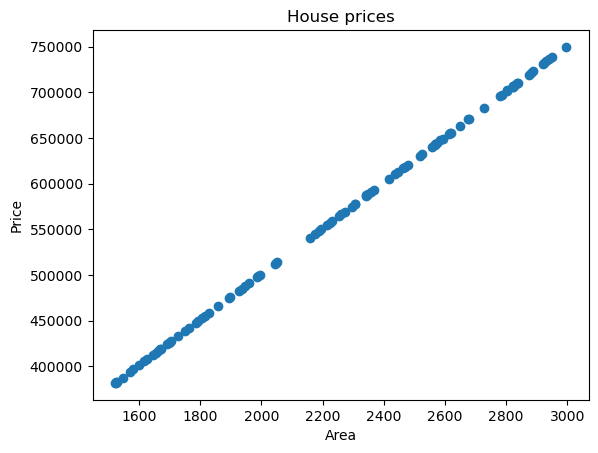

In [3]:
# Explore the dataset.
# 1. Display the dimensions of the dataset.
print(f"The dataset has {house_prices_dataset.shape[0]} rows and {house_prices_dataset.shape[1]} columns.\n")

# 2. Display the head of the dataset.
print(f"The dataset head:\n{house_prices_dataset.head()}.\n")

# 3. Describe the statistical properties of the dataset.
print(f"The dataset Properties:\n{house_prices_dataset.describe()}.\n")

# 4. Extract the input feature into X and the target into y.
x = house_prices_dataset[["area"]].values
y = house_prices_dataset[["price"]].values

# 5. Draw a scatter plot showing the feature X against the target y.
plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House prices")
plt.show()

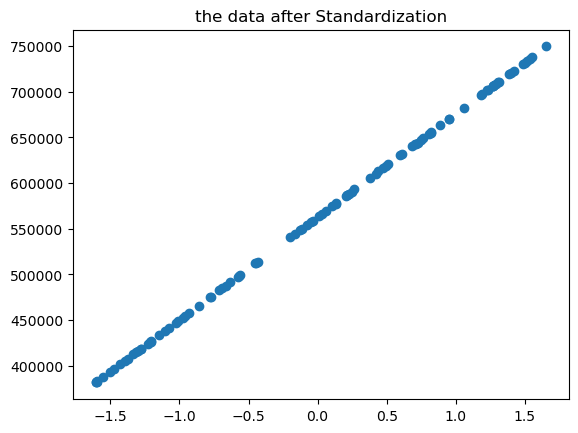

In [4]:
# Apply standardization to the input features.
scaler = StandardScaler()
x_Stand = scaler.fit_transform(x)

# Plot the data after standardization.
plt.scatter(x_Stand, y)
plt.title("the data after Standardization")
plt.show()

Theta0:  [1003.84909729]

Theta1:  [249.99625958]


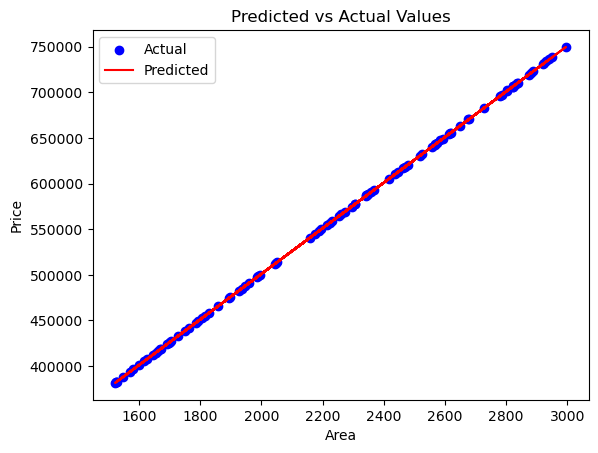

In [5]:

# Learn a new regression model from SkLearn library
model = LinearRegression()
model.fit(x, y)

#Display the values of theta0 and theat1 obtained.
print("Theta0: ", model.intercept_)
print("\nTheta1: ", model.coef_[0])

#Plot the predicted versus actual values.
y_pred = model.predict(x)
plt.scatter(x, y, color="blue", label="Actual")
plt.plot(x, y_pred, color="red", label="Predicted")
plt.title("Predicted vs Actual Values")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
#Implement univariate linear regression using the normal equation.
X = np.c_[np.ones(x_Stand.shape[0]), x_Stand]
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Display the values of theta_0 and theta_1 obtained.
print("Theta0: ", theta[0])
print("\nTheta1: ", theta[1])

Theta0:  [562990.3407]

Theta1:  [112895.66732934]


Theta0:  562966.0357047117

Theta1:  112890.79348255106


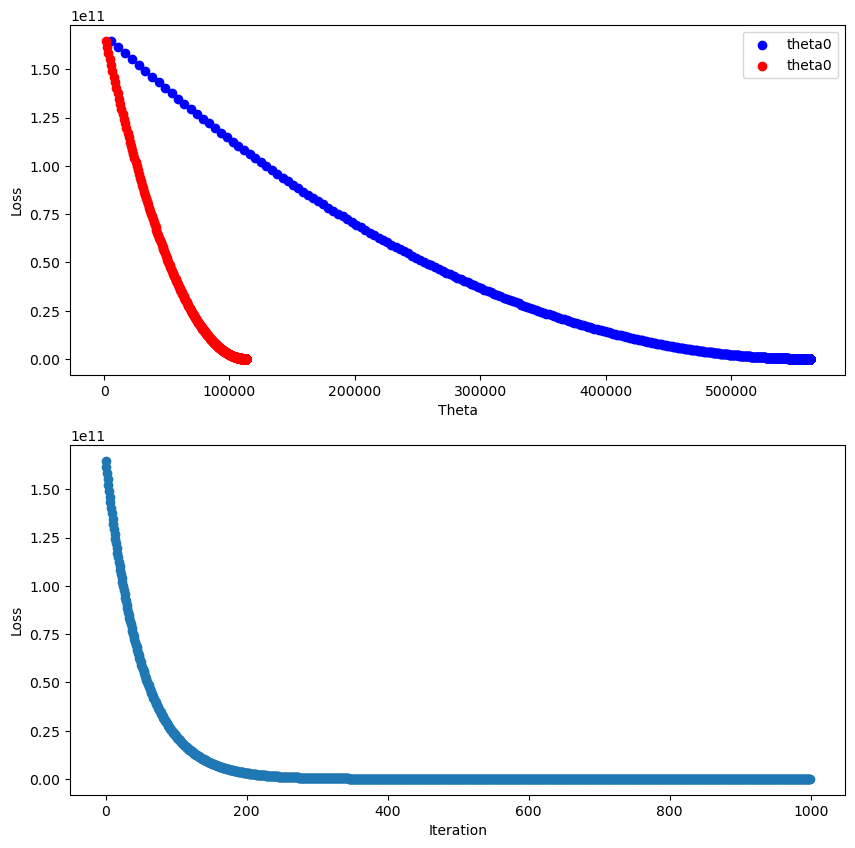

In [7]:
# Code the batch gradient descent algorithm
def batch_gradient_descent(x, y, learning_rate, iterations):
    l = len(y)
    theta0 = 0
    theta1 = 0
    loss_history = []
    theta0_history = []
    theta1_history = []
    
    for i in range(iterations):
        predictions = theta0 + theta1 * x
        error = predictions - y
        theta0 = theta0 - (learning_rate / l) * error.sum()
        theta1 = theta1 - (learning_rate / l) * (error * x).sum()
        loss = np.sum((predictions - y)**2) / (2*l)
        loss_history.append(loss)
        theta0_history.append(theta0)
        theta1_history.append(theta1)
    return theta0, theta1, loss_history, theta0_history, theta1_history
learning_rate = 0.01
iterations = 1000
theta0, theta1, loss_history, theta0_history, theta1_history = batch_gradient_descent(x_Stand, y, learning_rate, iterations)

# Display the values of theta0 and theta1 obtained.
print("Theta0: ", theta0)
print("\nTheta1: ", theta1)

# Plot the change in the loss function with respect to theta_0 and theta_1.
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].scatter(theta0_history, loss_history, color = "blue", label="theta0")
ax[0].scatter(theta1_history, loss_history, color="red", label="theta0") 
ax[0].set_xlabel("Theta")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot the change in the loss function with respect to the iteration number.
ax[1].scatter(range(iterations), loss_history)
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Loss")

plt.show()

In [8]:
# predict and print the price of a house having an area of 2000.
#Using trained SkLearn model.
area = scaler.transform([[2000]])
price_sklearn = model.predict(area)
print(f"The predicted price using the trained SkLearn model: {price_sklearn[0][0]}\n")

# Using the normal equation

price_normal_eq = theta[0] + theta[1] * area
print(f"The predicted price using the normal equation: {price_normal_eq[0][0]}\n")

# Using the batch gradient descent approach

price_gradient_descent = theta0 + theta1 * area
print(f"The predicted price using the batch gradient descent approach: {price_gradient_descent[0][0]}\n")

The predicted price using the trained SkLearn model: 866.5695931660811

The predicted price using the normal equation: 500996.36824889656

The predicted price using the batch gradient descent approach: 500974.7396107308

